In [ ]:
# instalar librerias para analisis descrptivo y predictivo

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [ ]:
# Importar las librerias necesarias para el analisis de datos descriptivo y predictivo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Leer el archivo .xlsx

import pandas as pd

df = pd.read_excel('Sprint1Table.xlsx')


In [ ]:
# Imprimos las 10 primeras filas para ver el nuevo df

df.head(10)

,FECHA,RANGO HORARIO,DIA SEMANA,DISTRITO,LUGAR ACCIDENTE,Nº,Nº PARTE,CPFA Granizo,CPFA Hielo,CPFA Lluvia,...,CPSV Grava Suelta,CPSV Hielo,CPSV Seca Y Limpia,Nº VICTIMAS *,TIPO ACCIDENTE,Tipo Vehiculo,TIPO PERSONA,SEXO,LESIVIDAD,Tramo Edad
0,2012-01-01,DE 2:00 A 2:59,DOMINGO,CENTRO,CALLE DE LA PRINCESA NUM ...,10.0,2012/98,NO,NO,NO,...,NO,NO,SI,2,ATROPELLO,NO ASIGNADO,PEATON,HOMBRE,HL,DE 25 A 29 AÑOS
1,2012-01-01,DE 2:00 A 2:59,DOMINGO,CENTRO,CALLE DE LA PRINCESA NUM ...,10.0,2012/98,NO,NO,NO,...,NO,NO,SI,2,ATROPELLO,NO ASIGNADO,PEATON,MUJER,HL,DE 25 A 29 AÑOS
2,2012-01-01,DE 2:00 A 2:59,DOMINGO,CENTRO,CALLE DE LA PRINCESA NUM ...,10.0,2012/98,NO,NO,NO,...,NO,NO,SI,2,ATROPELLO,NO ASIGNADO,TESTIGO,HOMBRE,IL,DESCONOCIDA
3,2012-01-01,DE 2:00 A 2:59,DOMINGO,CENTRO,CALLE DE LA PRINCESA NUM ...,10.0,2012/98,NO,NO,NO,...,NO,NO,SI,2,ATROPELLO,AUTO-TAXI,CONDUCTOR,HOMBRE,IL,DE 35 A 39 AÑOS
4,2012-01-01,DE 2:00 A 2:59,DOMINGO,PUENTE DE VALLECAS,AVENIDA DE SAN DIEGO NUM ...,96.0,2012/118,NO,NO,NO,...,NO,NO,SI,1,OTRAS CAUSAS,TURISMO,CONDUCTOR,HOMBRE,IL,DE 25 A 29 AÑOS
5,2012-01-01,DE 2:00 A 2:59,DOMINGO,PUENTE DE VALLECAS,AVENIDA DE SAN DIEGO NUM ...,96.0,2012/118,NO,NO,NO,...,NO,NO,SI,1,OTRAS CAUSAS,TURISMO,CONDUCTOR,HOMBRE,IL,DE 35 A 39 AÑOS
6,2012-01-01,DE 2:00 A 2:59,DOMINGO,PUENTE DE VALLECAS,AVENIDA DE SAN DIEGO NUM ...,96.0,2012/118,NO,NO,NO,...,NO,NO,SI,1,OTRAS CAUSAS,TURISMO,VIAJERO,HOMBRE,IL,DE 21 A 24 AÑOS
7,2012-01-01,DE 2:00 A 2:59,DOMINGO,PUENTE DE VALLECAS,AVENIDA DE SAN DIEGO NUM ...,96.0,2012/118,NO,NO,NO,...,NO,NO,SI,1,OTRAS CAUSAS,TURISMO,VIAJERO,MUJER,HL,DE 18 A 20 AÑOS
8,2012-01-01,DE 2:00 A 2:59,DOMINGO,PUENTE DE VALLECAS,AVENIDA DE SAN DIEGO NUM ...,96.0,2012/118,NO,NO,NO,...,NO,NO,SI,1,OTRAS CAUSAS,TURISMO,VIAJERO,HOMBRE,IL,DE 40 A 44 AÑOS
9,2012-01-01,DE 2:00 A 2:59,DOMINGO,TETUAN,CALLE DE BRAVO MURILLO - CALLE DE LAS CAROLINA...,0.0,2012/3,NO,NO,NO,...,NO,NO,SI,3,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,IL,DE 60 A 64 AÑOS


In [ ]:
# Vemos toda la informacion del df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199078 entries, 0 to 199077
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   FECHA               199078 non-null  datetime64[ns]
 1   RANGO HORARIO       199078 non-null  object        
 2   DIA SEMANA          199078 non-null  object        
 3   DISTRITO            199078 non-null  object        
 4   LUGAR ACCIDENTE     199078 non-null  object        
 5   Nº                  195991 non-null  float64       
 6   Nº PARTE            199078 non-null  object        
 7   CPFA Granizo        199078 non-null  object        
 8   CPFA Hielo          199078 non-null  object        
 9   CPFA Lluvia         199078 non-null  object        
 10  CPFA Niebla         199078 non-null  object        
 11  CPFA Seco           199078 non-null  object        
 12  CPFA Nieve          199078 non-null  object        
 13  CPSV Mojada         199078 no

In [ ]:
# analizamos si tenemos valores nulos

df.isnull().sum()

,0
FECHA,0
RANGO HORARIO,0
DIA SEMANA,0
DISTRITO,0
LUGAR ACCIDENTE,0
Nº,3087
Nº PARTE,0
CPFA Granizo,0
CPFA Hielo,0
CPFA Lluvia,0


In [ ]:
# Cambiamos el los valores nulos por 0 (son numeros de calles que no tenemos) y cambiamos el formate de la columna N° a entero porque son numeros de calles

df['Nº'] = pd.to_numeric(df['Nº'], errors='coerce').fillna(0)

df['Nº'] = df['Nº'].astype(int)

In [ ]:
# Ver cada columna con sus datos distintos y las cantidades

for col in df.columns:
    print(df[col].value_counts())
    print('\n')

FECHA
2013-10-25    212
2017-12-21    182
2017-11-28    173
2017-03-10    170
2013-10-11    166
             ... 
2013-08-18     17
2016-08-14     15
2018-03-29     15
2014-08-31     13
2015-08-02     12
Name: count, Length: 2557, dtype: int64


RANGO HORARIO
DE 14:00 A 14:59    14575
DE 19:00 A 19:59    14232
DE 20:00 A 20:59    13619
DE 13:00 A 13:59    12667
DE 18:00 A 18:59    12647
DE 15:00 A 15:59    11664
DE 9:00 A 9:59      11545
DE 12:00 A 12:59    11340
DE 17:00 A 17:59    11249
DE 21:00 A 21:59    11164
DE 16:00 A 16:59    10677
DE 11:00 A 11:59     9761
DE 8:00 A 8:59       9376
DE 10:00 A 10:59     9159
DE 22:00 A 22:59     8398
DE 23:00 A 23:59     5602
DE 7:00 A 7:59       5090
DE 00:00 A 00:59     3688
DE 6:00 A 6:59       2954
DE 1:00 A 1:59       2700
DE 2:00 A 2:59       2111
DE 3:00 A 3:59       1728
DE 5:00 A 5:59       1612
DE 4:00 A 4:59       1520
Name: count, dtype: int64


DIA SEMANA
VIERNES      34083
JUEVES       30565
MIERCOLES    30484
MARTES       29729
L

In [ ]:
#Describe del df

df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
FECHA,199078,NaN,NaN,NaN,2015-08-04 11:54:54.029475840,2012-01-01 00:00:00,2013-11-17 00:00:00,2015-08-26 00:00:00,2017-05-11 00:00:00,2018-12-31 00:00:00,NaN
RANGO HORARIO,199078,24,DE 14:00 A 14:59,14575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIA SEMANA,199078,7,VIERNES,34083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTRITO,199078,22,SALAMANCA,15288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LUGAR ACCIDENTE,199078,13960,AUTOVIA M-30 CALZADA 1 KM. ...,6293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nº,199078.0,NaN,NaN,NaN,953.714539,0.0,0.0,1.0,48.0,53500.0,3898.729219
Nº PARTE,199078,68773,2012/11769,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPFA Granizo,199078,2,NO,199048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPFA Hielo,199078,2,NO,198975,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPFA Lluvia,199078,2,NO,176956,NaN,NaN,NaN,NaN,NaN,NaN,NaN


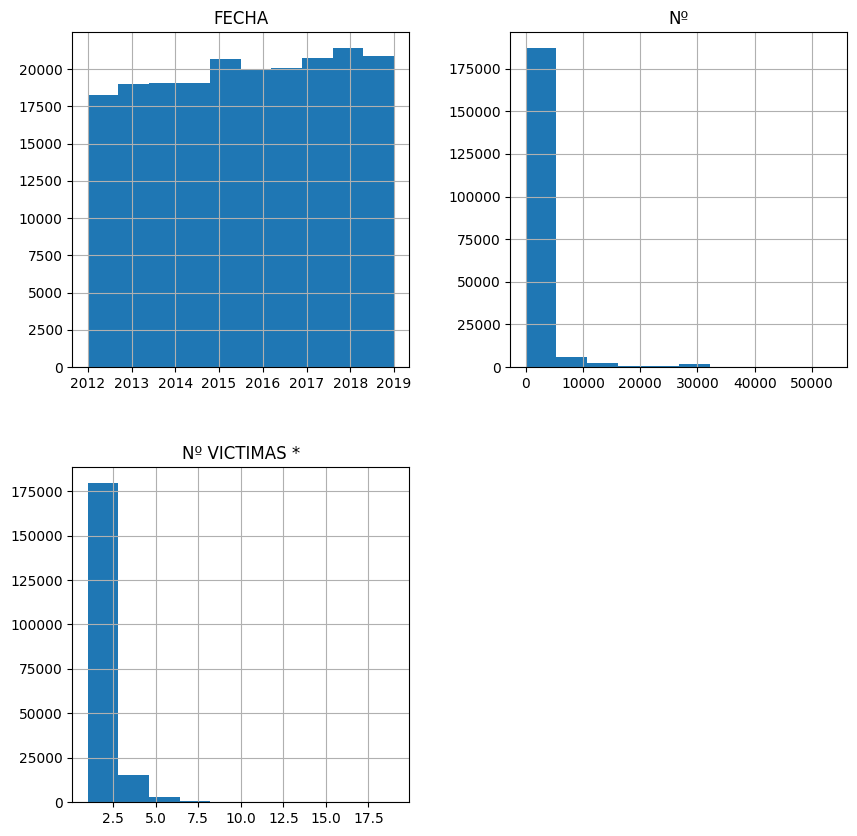

In [ ]:
# Distribucion por variable numerica

df.hist(figsize=(10, 10))
plt.show()

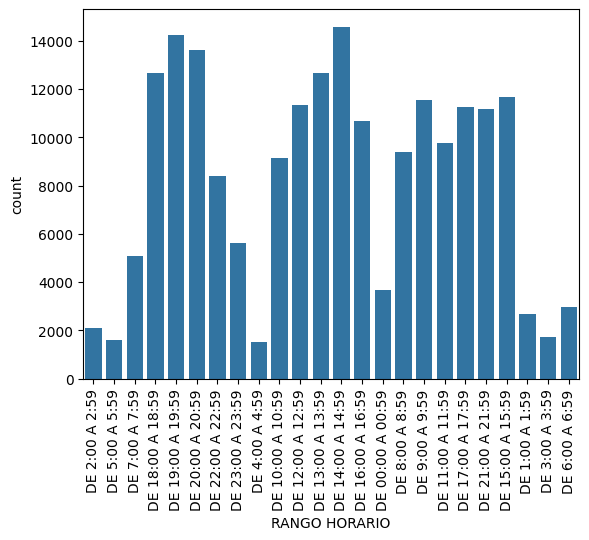

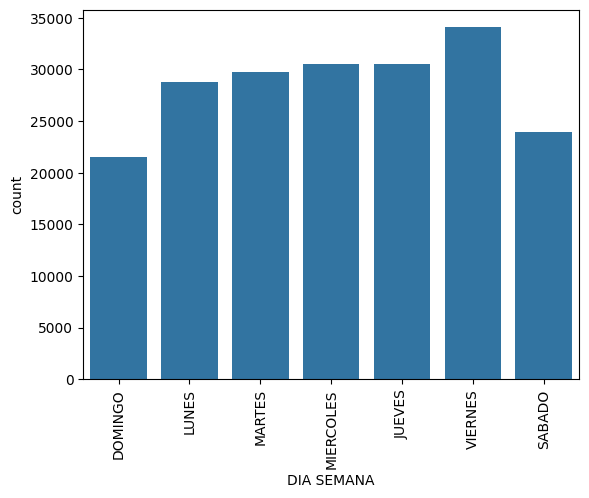

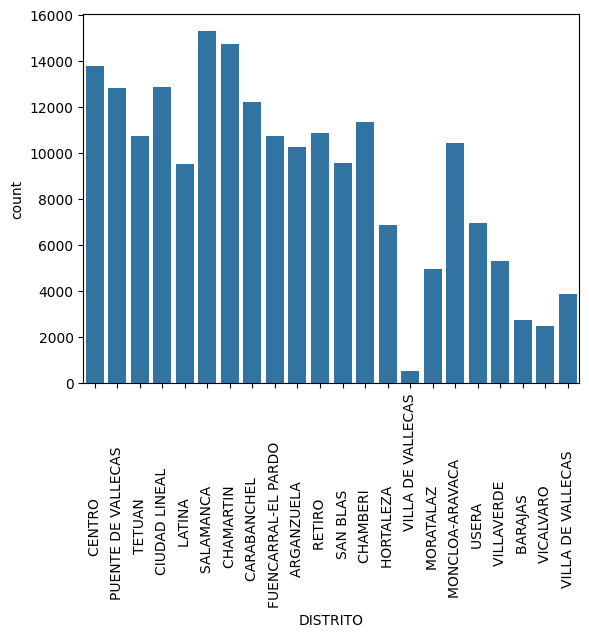

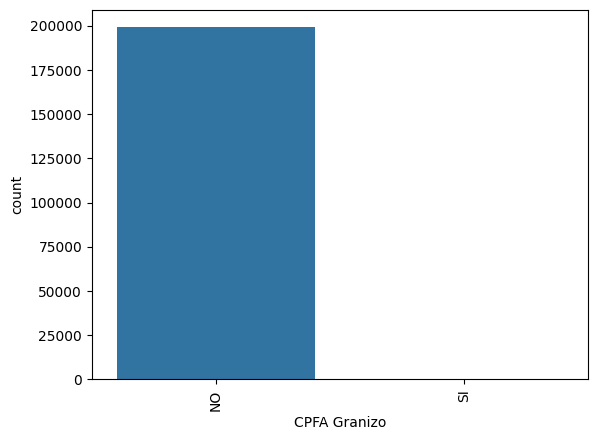

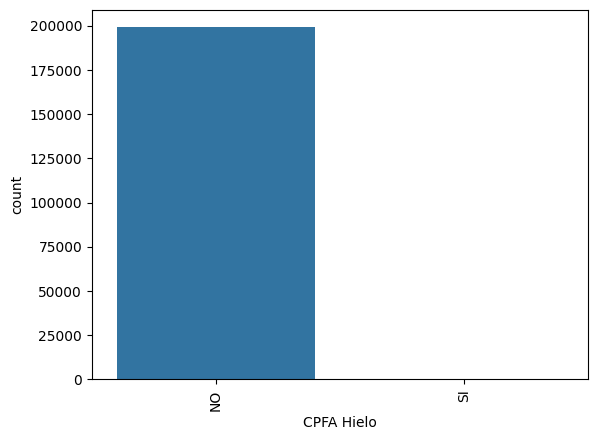

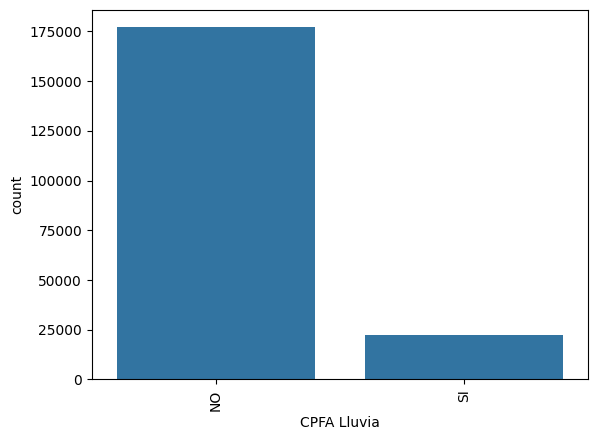

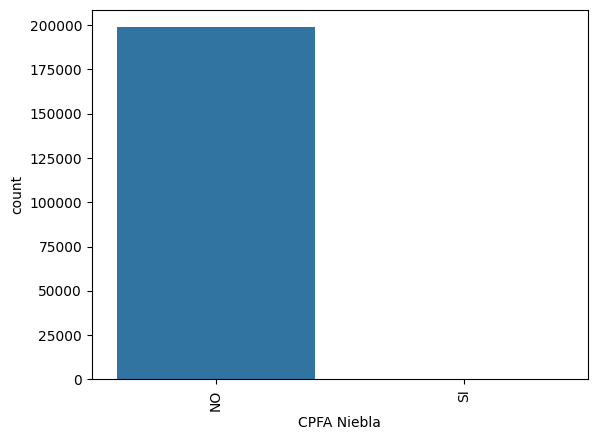

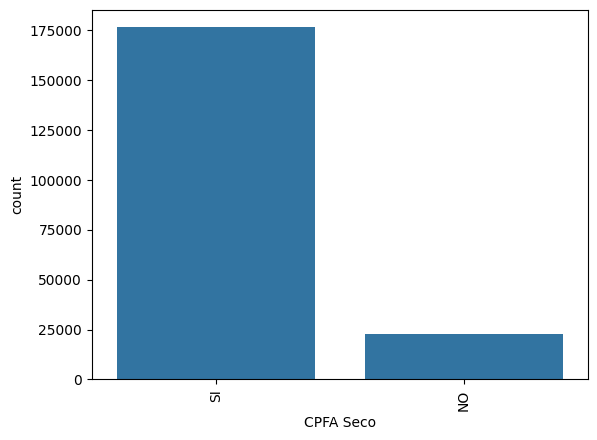

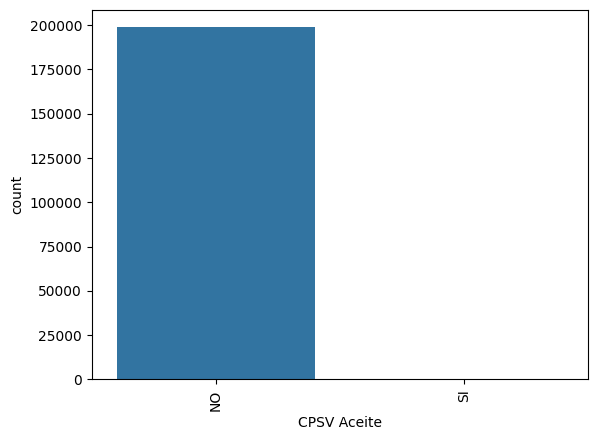

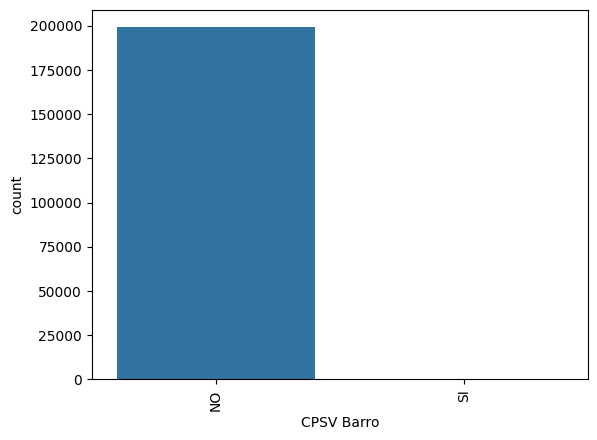

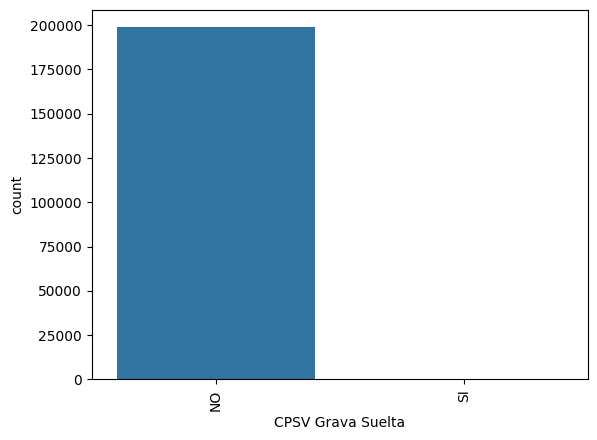

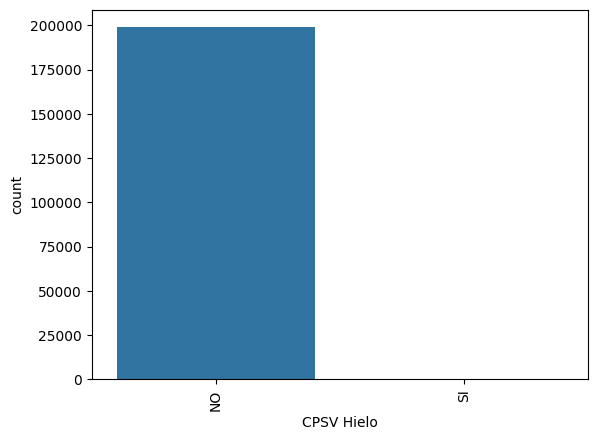

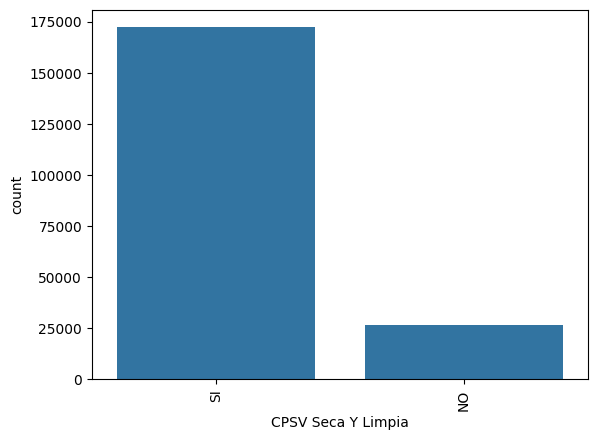

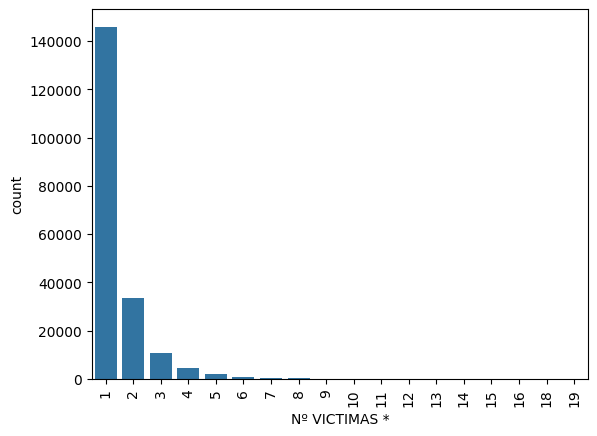

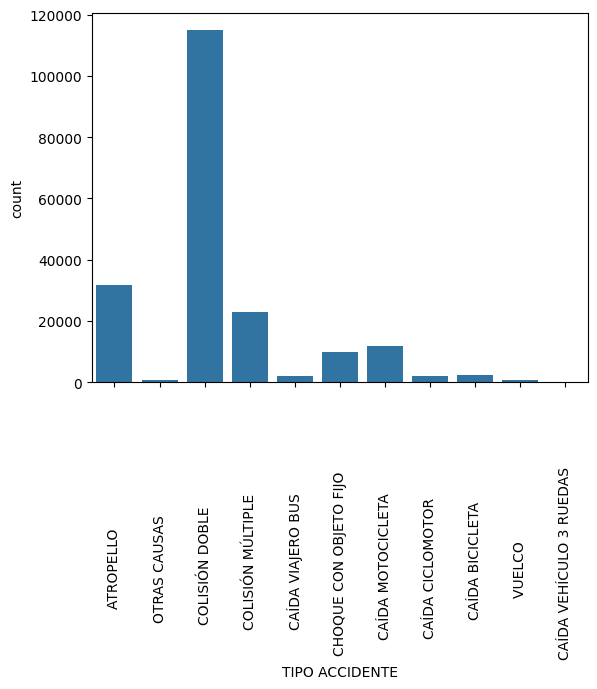

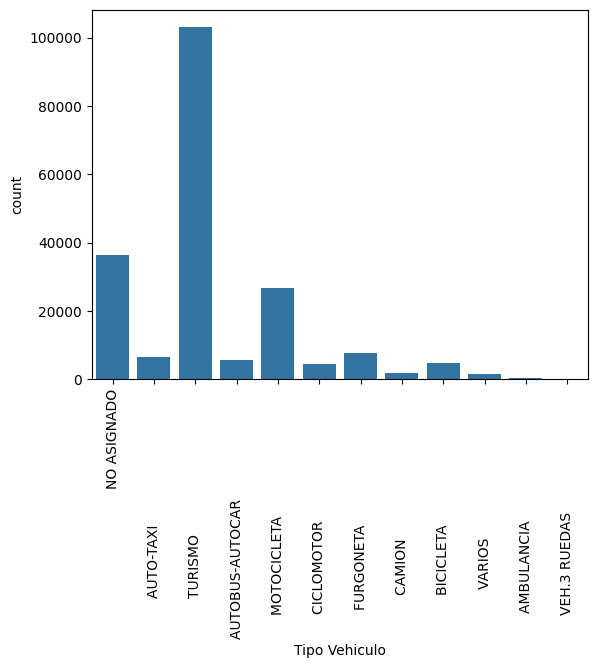

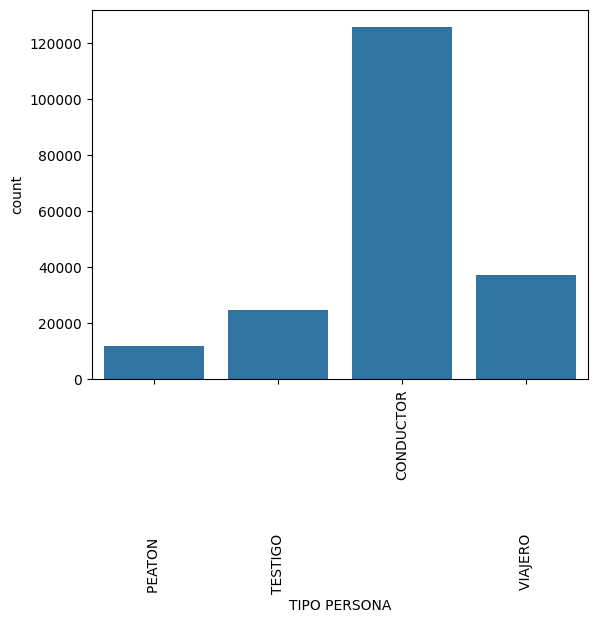

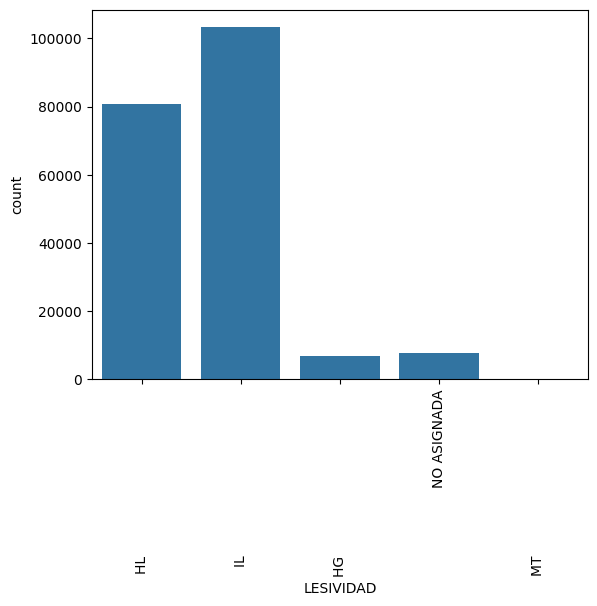

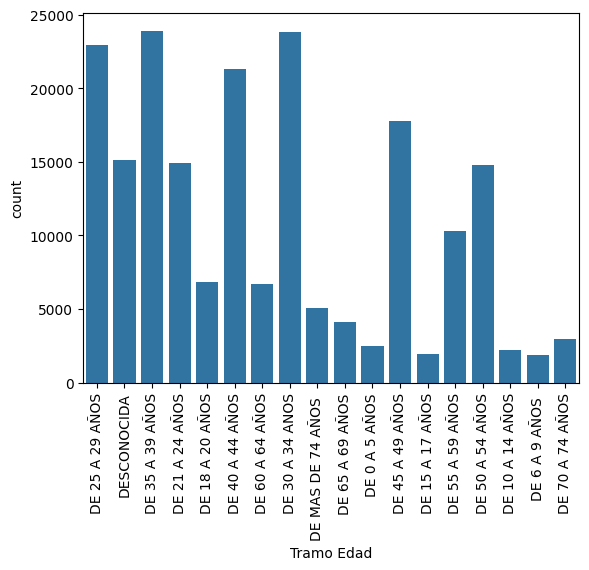

In [ ]:
# Analisis de frecuencia de variables categóricas.

variables_categoricas = ['RANGO HORARIO', 'DIA SEMANA', 'DISTRITO',
                         'CPFA Granizo', 'CPFA Hielo', 'CPFA Lluvia',
                         'CPFA Niebla', 'CPFA Seco', 'CPSV Aceite',
                         'CPSV Barro', 'CPSV Grava Suelta', 'CPSV Hielo',
                         'CPSV Seca Y Limpia', 'Nº VICTIMAS *', 'TIPO ACCIDENTE',
                         'Tipo Vehiculo', 'TIPO PERSONA', 'LESIVIDAD', 'Tramo Edad']

# Crear un gráfico para cada variable categórica
for col in variables_categoricas:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    plt.show()

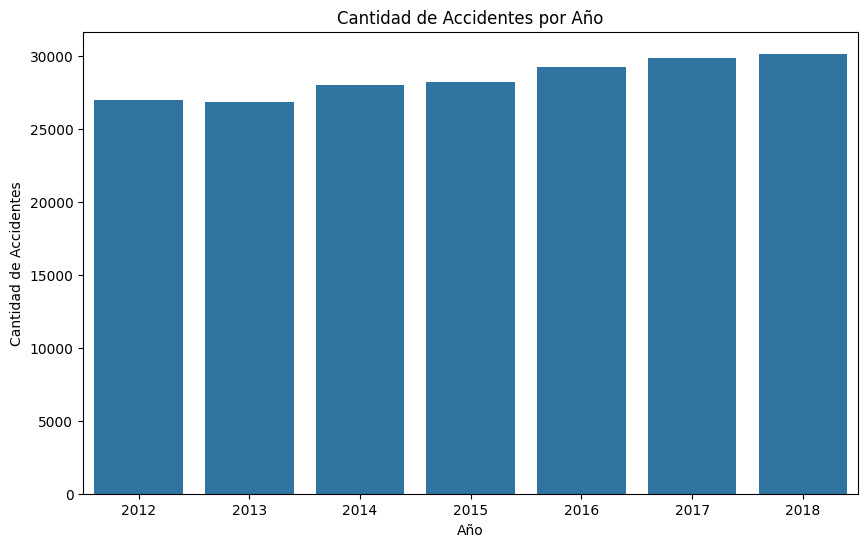

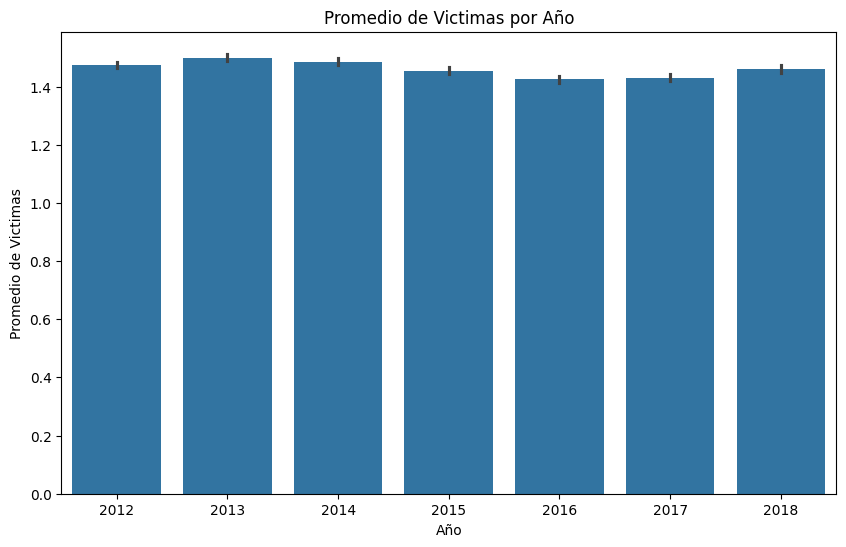

In [ ]:
# Analisis Bi variable de Año + Numericas.


# Extraer año de la columna FECHA
df['Año'] = df['FECHA'].dt.year

# grafico de cantidad de accidentes por año

plt.figure(figsize=(10, 6))
sns.countplot(x='Año', data=df)
plt.title('Cantidad de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.show()

# grafico de promedio de victimas por año

plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='Nº VICTIMAS *', data=df)
plt.title('Promedio de Victimas por Año')
plt.xlabel('Año')
plt.ylabel('Promedio de Victimas')
plt.show()


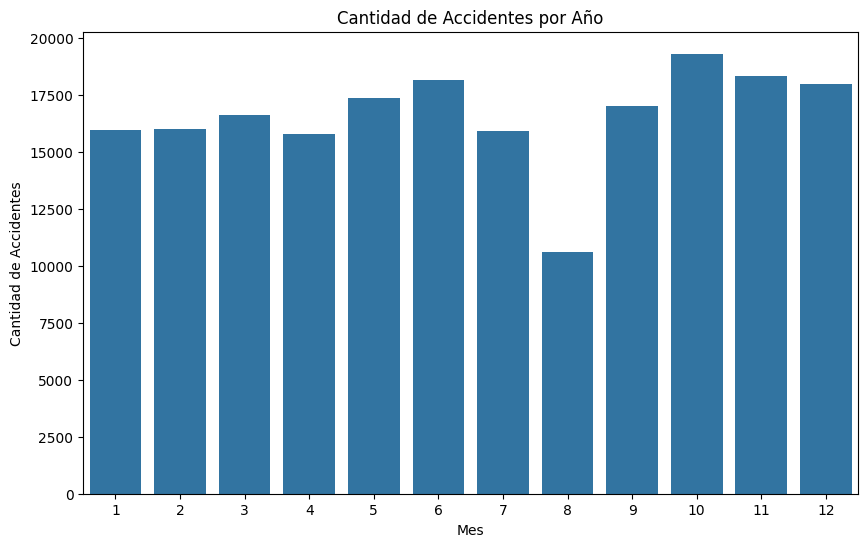

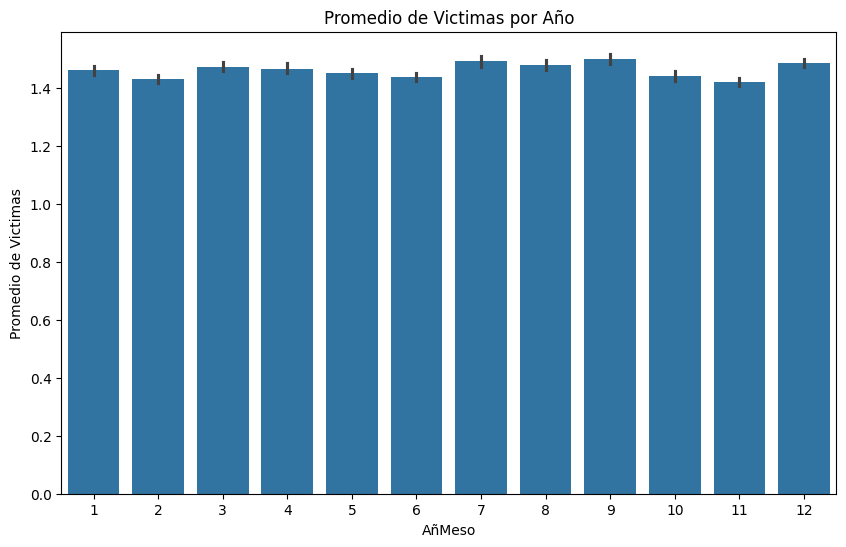

In [ ]:
# Analisis Bi variable de mes + Numericas.


# Extraer mes de la columna FECHA
df['Mes'] = df['FECHA'].dt.month

# grafico de cantidad de accidentes por mes

plt.figure(figsize=(10, 6))
sns.countplot(x='Mes', data=df)
plt.title('Cantidad de Accidentes por Año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Accidentes')
plt.show()

# grafico de promedio de victimas por mes
plt.figure(figsize=(10, 6))
sns.barplot(x='Mes', y='Nº VICTIMAS *', data=df)
plt.title('Promedio de Victimas por Año')
plt.xlabel('AñMeso')
plt.ylabel('Promedio de Victimas')
plt.show()


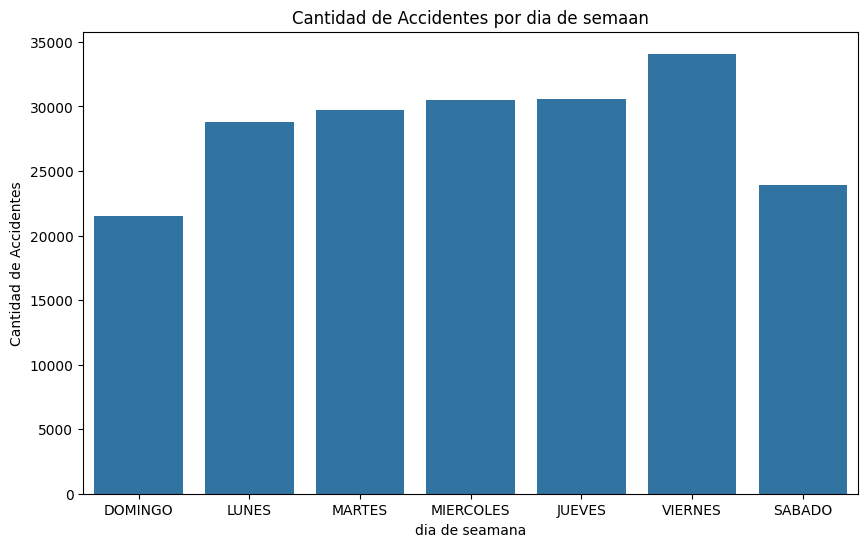

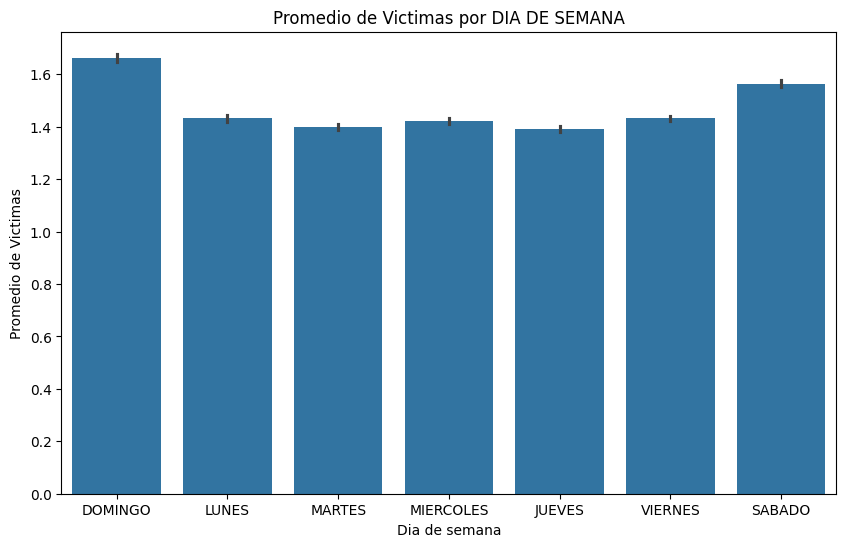

In [ ]:
# Analisis Bi variable de Dia de semana + Numericas.



# grafico de cantidad de accidentes por año

plt.figure(figsize=(10, 6))
sns.countplot(x='DIA SEMANA', data=df)
plt.title('Cantidad de Accidentes por dia de semaan')
plt.xlabel('dia de seamana')
plt.ylabel('Cantidad de Accidentes')
plt.show()

# grafico de promedio de victimas por año columna ['Nº VICTIMAS *']

plt.figure(figsize=(10, 6))
sns.barplot(x='DIA SEMANA', y='Nº VICTIMAS *', data=df)
plt.title('Promedio de Victimas por DIA DE SEMANA')
plt.xlabel('Dia de semana')
plt.ylabel('Promedio de Victimas')
plt.show()


In [ ]:
# Lista de combinaciones para tablas de contingencia
combinaciones = [
    ('DIA SEMANA', 'SEXO'),
    ('DIA SEMANA', 'TIPO PERSONA'),
    ('DIA SEMANA', 'TIPO ACCIDENTE'),
    ('SEXO', 'TIPO PERSONA'),
    ('SEXO', 'TIPO ACCIDENTE'),
    ('TIPO PERSONA', 'TIPO ACCIDENTE')]
# Crear e imprimir tablas de contingencia
tablas_contingencia = {}
for var1, var2 in combinaciones:
    tabla = pd.crosstab(df[var1], df[var2])
    tablas_contingencia[f'{var1}_vs_{var2}'] = tabla
    print(f"\nTabla de Contingencia: {var1} vs {var2}")
    display(tabla)



Tabla de Contingencia: DIA SEMANA vs SEXO


SEXO,HOMBRE,MUJER,NO ASIGNADO
DIA SEMANA,,,
DOMINGO,13309,6919,1272
JUEVES,19449,9811,1305
LUNES,18240,9259,1272
MARTES,18889,9626,1214
MIERCOLES,19343,9755,1386
SABADO,15039,7620,1287
VIERNES,21693,10850,1540



Tabla de Contingencia: DIA SEMANA vs TIPO PERSONA


TIPO PERSONA,CONDUCTOR,PEATON,TESTIGO,VIAJERO
DIA SEMANA,,,,
DOMINGO,12159,1038,2585,5718
JUEVES,19848,1852,3813,5052
LUNES,18626,1824,3500,4821
MARTES,19420,1839,3683,4787
MIERCOLES,19893,1882,3910,4799
SABADO,13779,1282,3014,5871
VIERNES,21809,1975,4220,6079



Tabla de Contingencia: DIA SEMANA vs TIPO ACCIDENTE


TIPO ACCIDENTE,ATROPELLO,CAÍDA BICICLETA,CAÍDA CICLOMOTOR,CAÍDA MOTOCICLETA,CAÍDA VEHÍCULO 3 RUEDAS,CAÍDA VIAJERO BUS,CHOQUE CON OBJETO FIJO,COLISIÓN DOBLE,COLISIÓN MÚLTIPLE,OTRAS CAUSAS,VUELCO
DIA SEMANA,,,,,,,,,,,
DOMINGO,2985,377,283,883,0,138,1810,12632,2100,142,150
JUEVES,4932,330,284,1984,0,374,1195,17619,3561,141,145
LUNES,4746,277,264,1780,7,334,1211,16583,3328,147,94
MARTES,4998,334,260,1899,5,358,1104,16936,3627,105,103
MIERCOLES,5069,293,278,1968,0,395,1182,17630,3495,87,87
SABADO,3624,338,233,1165,2,220,1795,14174,2131,90,174
VIERNES,5421,360,361,2051,5,350,1444,19293,4560,133,105



Tabla de Contingencia: SEXO vs TIPO PERSONA


TIPO PERSONA,CONDUCTOR,PEATON,TESTIGO,VIAJERO
SEXO,,,,
HOMBRE,89863,5235,15839,15025
MUJER,28011,6456,7275,22098
NO ASIGNADO,7660,1,1611,4



Tabla de Contingencia: SEXO vs TIPO ACCIDENTE


TIPO ACCIDENTE,ATROPELLO,CAÍDA BICICLETA,CAÍDA CICLOMOTOR,CAÍDA MOTOCICLETA,CAÍDA VEHÍCULO 3 RUEDAS,CAÍDA VIAJERO BUS,CHOQUE CON OBJETO FIJO,COLISIÓN DOBLE,COLISIÓN MÚLTIPLE,OTRAS CAUSAS,VUELCO
SEXO,,,,,,,,,,,
HOMBRE,18181,1693,1467,8807,12,1052,4997,74699,14037,491,526
MUJER,12301,542,439,2437,5,1006,2587,35845,8165,274,239
NO ASIGNADO,1293,74,57,486,2,111,2157,4323,600,80,93



Tabla de Contingencia: TIPO PERSONA vs TIPO ACCIDENTE


TIPO ACCIDENTE,ATROPELLO,CAÍDA BICICLETA,CAÍDA CICLOMOTOR,CAÍDA MOTOCICLETA,CAÍDA VEHÍCULO 3 RUEDAS,CAÍDA VIAJERO BUS,CHOQUE CON OBJETO FIJO,COLISIÓN DOBLE,COLISIÓN MÚLTIPLE,OTRAS CAUSAS,VUELCO
TIPO PERSONA,,,,,,,,,,,
CONDUCTOR,11031,1756,1533,8799,8,817,6404,77761,16424,477,524
PEATON,11188,18,5,54,1,5,168,194,16,42,1
TESTIGO,7898,492,315,2125,7,266,1130,11567,722,83,120
VIAJERO,1658,43,110,752,3,1081,2039,25345,5640,243,213


# Analisis predictivo

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199078 entries, 0 to 199077
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   FECHA               199078 non-null  datetime64[ns]
 1   RANGO HORARIO       199078 non-null  object        
 2   DIA SEMANA          199078 non-null  object        
 3   DISTRITO            199078 non-null  object        
 4   LUGAR ACCIDENTE     199078 non-null  object        
 5   Nº                  199078 non-null  int64         
 6   Nº PARTE            199078 non-null  object        
 7   CPFA Granizo        199078 non-null  object        
 8   CPFA Hielo          199078 non-null  object        
 9   CPFA Lluvia         199078 non-null  object        
 10  CPFA Niebla         199078 non-null  object        
 11  CPFA Seco           199078 non-null  object        
 12  CPFA Nieve          199078 non-null  object        
 13  CPSV Mojada         199078 no

In [ ]:

# Agrupa por mes y suma el numero de accidentes
df_ag = df.groupby(pd.Grouper(key="FECHA", freq="M")).size().reset_index(name="count")

# renombra las columnas creadas por agrupacion
df_ag.columns = ["fecha", "valor"]

# establecer la fecha como índice
df_ag = df_ag.set_index("fecha")

<ipython-input-18-b36fea2b2da5>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_ag = df.groupby(pd.Grouper(key="FECHA", freq="M")).size().reset_index(name="count")


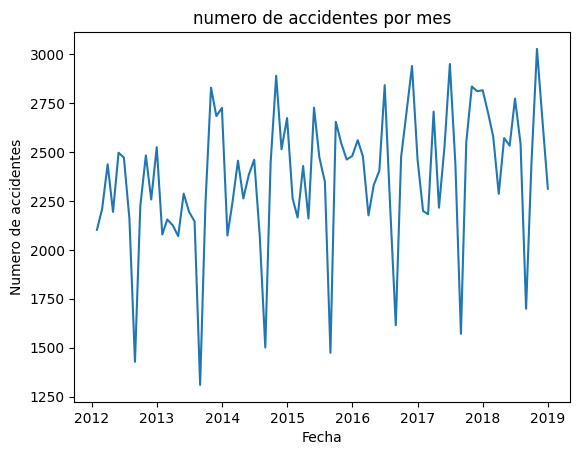

In [ ]:
plt.plot(df_ag["valor"])
plt.title("numero de accidentes por mes")
plt.xlabel("Fecha")
plt.ylabel("Numero de accidentes")
plt.show()

In [ ]:
#Verifico que el df este bien agrupado para separalo por train y test.
print(df_ag.head())
print(df_ag.tail())

            valor
fecha            
2012-01-31   2102
2012-02-29   2209
2012-03-31   2437
2012-04-30   2194
2012-05-31   2496
            valor
fecha            
2018-08-31   1699
2018-09-30   2439
2018-10-31   3026
2018-11-30   2670
2018-12-31   2312


In [ ]:
# punto de corte para dividir los datos
train_data = df_ag[:-3]  #hasta 3 meses antes del final
test_data = df_ag[-3:]  #ultimos 3 meses

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.3 MB/s eta 0:00:00


In [ ]:
# función auto_arima para encontrar los parametros automaticamente

from pmdarima import auto_arima


model = auto_arima(train_data["valor"], seasonal=False, suppress_warnings=True,
                  stepwise=True, trace=True)

# parametros (p, d, q) seleccionados
print(model.order)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1153.449, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1205.863, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1202.843, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1203.870, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1163.186, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1160.612, Time=0.20 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 3.702 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(2, 1, 2)


REsultados encontrados: 2,1,2


In [ ]:
# Uso los parámetros (p, d, q) para entrenar el modelo
p, d, q = model.order

model_arima = ARIMA(train_data["valor"], order=(p, d, q))
model_arima_fit = model_arima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
# predicciones en los datos de prueba
prediccion = model_arima_fit.forecast(steps=len(test_data))

# DataFrame con las predicciones
prediccion_df = pd.DataFrame({"fecha": test_data.index, "prediccion": prediccion})
prediccion_df = prediccion_df.set_index("fecha")

RMSE: 252.29103357457382


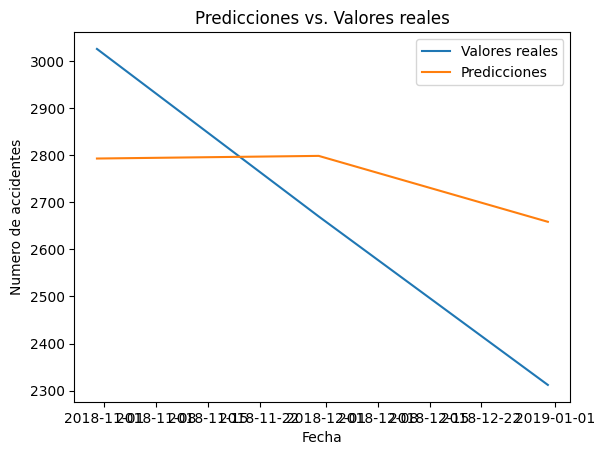

In [ ]:
# Calcula el error cuadrático medio (RMSE)
rmse = np.sqrt(mean_squared_error(test_data["valor"], prediccion))
print(f"RMSE: {rmse}")

# predicciones vs los valores reales
plt.plot(test_data["valor"], label="Valores reales")
plt.plot(prediccion_df["prediccion"], label="Predicciones")
plt.title("Predicciones vs. Valores reales")
plt.xlabel("Fecha")
plt.ylabel("Numero de accidentes")
plt.legend()
plt.show()

<ipython-input-27-0087de18fe64>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_futuro = pd.date_range(start="2018-10-01", periods=12, freq="M")  # (12 meses)


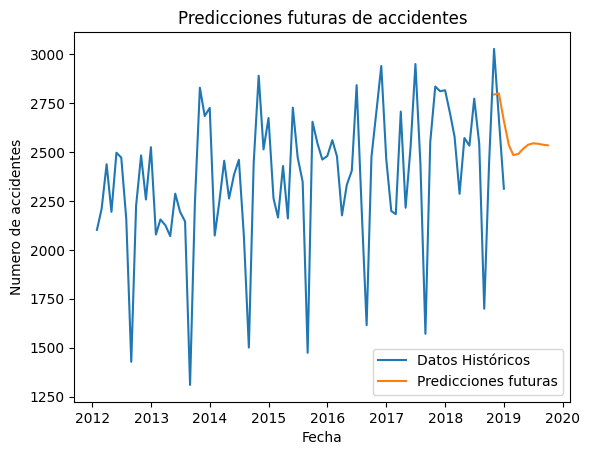

In [ ]:
# rango de fechas para el futuro
fechas_futuro = pd.date_range(start="2018-10-01", periods=12, freq="M")  # (12 meses)

# predicciones para el futuro
predicciones_futuro = model_arima_fit.forecast(steps=len(fechas_futuro))

# Crea un DataFrame con las predicciones futuras
predicciones_futuro_df = pd.DataFrame({"fecha": fechas_futuro, "prediccion": predicciones_futuro})
predicciones_futuro_df = predicciones_futuro_df.set_index("fecha")

# Visualiza las predicciones futuras
plt.plot(df_ag["valor"], label="Datos Históricos")
plt.plot(predicciones_futuro_df["prediccion"], label="Predicciones futuras")
plt.title("Predicciones futuras de accidentes")
plt.xlabel("Fecha")
plt.ylabel("Numero de accidentes")
plt.legend()
plt.show()

## Conclusión

En este análisis inicial del número de accidentes, el modelo ARIMAX mostró limitaciones para predecir con precisión la tendencia decreciente observada en los datos reales. Las predicciones resultaron poco informativas, sugiriendo un valor promedio constante en lugar de capturar la variabilidad de la serie temporal. Esto se reflejó en un error cuadrático medio (RMSE) relativamente alto (256), indicando una diferencia significativa entre los valores predichos y los reales. Estos resultados sugieren que el modelo ARIMAX, en su configuración actual, no representa adecuadamente el número de accidentes. Para mejorar la capacidad predictiva del modelo, se podrían explorar varias vías, como ajustar los parámetros del modelo, considerar la estacionalidad de los datos (si la hay), o incorporar variables exógenas relevantes como factores climáticos y del suelo.

